In [103]:
import pandas as pd
import numpy as np
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns

In [104]:
comments = pd.read_csv('C:/Users/SATYAJIT/Downloads/comment_file - Sheet2 (1).csv') # read the collected raw data

In [105]:
comments.head() # checking sample of the tabular data

,Comment
0,Just look at this australoid
1,Rahi baat muslim ki <br>Wo har govt. Me ek jai...
2,Aaj India me 80 crore log 1 time ka khana modi...
3,Ladki ko chedna Islam ne sikhaya waah <br>To r...
4,Tumne guru nanak ji ke sabse priye sathi kon t...


In [106]:
# converting .csv file to .txt for read string readability

text = list(comments['Comment'])
text = ' '.join(str(e) for e in text)
text

'Just look at this australoid Rahi baat muslim ki <br>Wo har govt. Me ek jaisa h <br>Up congress me masjid me 400 muslim ko goli mari <br>Up samajwadi me muzzafarnagar riots me yahi hua <br>Up bjp me same situation hai <br>BSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai Aaj India me 80 crore log 1 time ka khana modi ke photo waale rasan bag par nirbhar h <br>Independent India ki nayi soch h ye <br>Make in India <br>Logo ko free me do yahi soch k vote denge baaki <br>Hunger index <br>Human right index <br>Freedom of media <br>Human development index<br>Democracy index<br>Global economic freedom index<br>Gender gap index<br>Global curruption index <br>Global hunger index <br>BSS ek baar jaake dekhlo pata chal jayega aapko modi yogi ne kya kiya hai Ladki ko chedna Islam ne sikhaya waah <br>To raavan ne kya kiya tha sita maa ke sath Tumne guru nanak ji ke sabse priye sathi kon the ye bhi btado <br>Joki the bhai Mastana<br>Or wo bhi muslim the Ask log bhukh say

In [107]:
# defining function to check the most frequently occuring word

def plot_word_frequency(words, top_n):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    sns.set(rc = {'figure.figsize':(15,8)})
    plot = sns.barplot(labels, counts)
    print(labels)
    return plot

['the', 'is', 'and', 'to', 'of', 'a', 'in', 'are', 'you', 'he']


<AxesSubplot:>

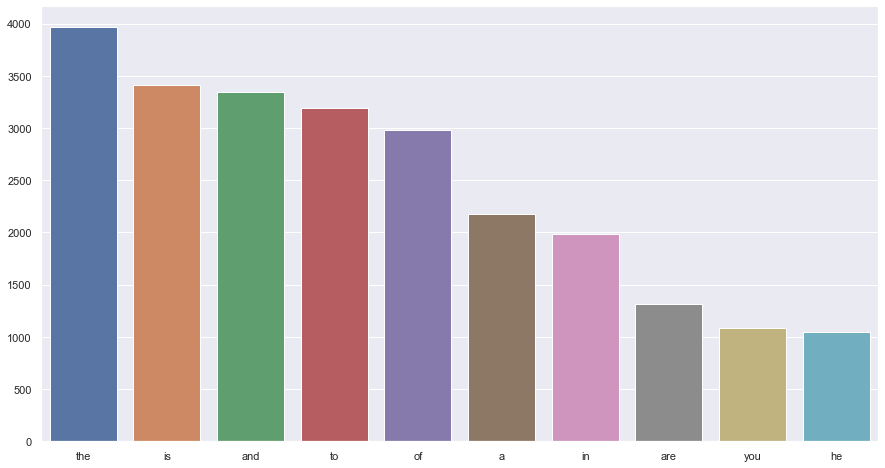

In [108]:
# frequently occuring words with unclean data(i.e. common phrases and acronyms present)
words = text.split()
plot_word_frequency(words, 10)

In [109]:
# defining stopwords i.e. unnecessary filler texts

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [110]:
# constructing custom stopword list

english = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'hai','I','ko','ki','ke','se','ka',',','like','.','The','He','This','one', 'bhi', 'aur', 'k','nahi', 'don&#39;t','ye', 'man','u', 'rss','<a','know','ho', 'guy', 'hi', 'even','h','ne', 'bhai', 'video', 'kya','also', 'and', 'said','rss', 'say']

In [95]:
words

['Just',
 'look',
 'at',
 'this',
 'australoid',
 'Rahi',
 'baat',
 'muslim',
 'ki',
 '<br>Wo',
 'har',
 'govt.',
 'Me',
 'ek',
 'jaisa',
 'h',
 '<br>Up',
 'congress',
 'me',
 'masjid',
 'me',
 '400',
 'muslim',
 'ko',
 'goli',
 'mari',
 '<br>Up',
 'samajwadi',
 'me',
 'muzzafarnagar',
 'riots',
 'me',
 'yahi',
 'hua',
 '<br>Up',
 'bjp',
 'me',
 'same',
 'situation',
 'hai',
 '<br>BSS',
 'bsp',
 'me',
 'thoda',
 'sukun',
 'tha',
 'mila',
 'kuch',
 'nhi',
 'BSS',
 'jaan',
 'maal',
 'ka',
 'nuksaan',
 'nhi',
 'hua',
 'hai',
 'Aaj',
 'India',
 'me',
 '80',
 'crore',
 'log',
 '1',
 'time',
 'ka',
 'khana',
 'modi',
 'ke',
 'photo',
 'waale',
 'rasan',
 'bag',
 'par',
 'nirbhar',
 'h',
 '<br>Independent',
 'India',
 'ki',
 'nayi',
 'soch',
 'h',
 'ye',
 '<br>Make',
 'in',
 'India',
 '<br>Logo',
 'ko',
 'free',
 'me',
 'do',
 'yahi',
 'soch',
 'k',
 'vote',
 'denge',
 'baaki',
 '<br>Hunger',
 'index',
 '<br>Human',
 'right',
 'index',
 '<br>Freedom',
 'of',
 'media',
 '<br>Human',
 'developm

In [111]:
# cleaning the text i.e. removing stopwords

sample_words = [word.lower() for word in words if word not in english]
print(sample_words)

['just', 'look', 'australoid', 'rahi', 'baat', 'muslim', '<br>wo', 'har', 'govt.', 'me', 'ek', 'jaisa', '<br>up', 'congress', 'masjid', '400', 'muslim', 'goli', 'mari', '<br>up', 'samajwadi', 'muzzafarnagar', 'riots', 'yahi', 'hua', '<br>up', 'bjp', 'situation', '<br>bss', 'bsp', 'thoda', 'sukun', 'tha', 'mila', 'kuch', 'nhi', 'bss', 'jaan', 'maal', 'nuksaan', 'nhi', 'hua', 'aaj', 'india', '80', 'crore', 'log', '1', 'time', 'khana', 'modi', 'photo', 'waale', 'rasan', 'bag', 'par', 'nirbhar', '<br>independent', 'india', 'nayi', 'soch', '<br>make', 'india', '<br>logo', 'free', 'yahi', 'soch', 'vote', 'denge', 'baaki', '<br>hunger', 'index', '<br>human', 'right', 'index', '<br>freedom', 'media', '<br>human', 'development', 'index<br>democracy', 'index<br>global', 'economic', 'freedom', 'index<br>gender', 'gap', 'index<br>global', 'curruption', 'index', '<br>global', 'hunger', 'index', '<br>bss', 'ek', 'baar', 'jaake', 'dekhlo', 'pata', 'chal', 'jayega', 'aapko', 'modi', 'yogi', 'kiya', 'l

In [97]:
sample_text = " ".join(sample_words)
print(sample_text)

just look australoid rahi baat muslim <br>wo har govt. me ek jaisa <br>up congress masjid 400 muslim goli mari <br>up samajwadi muzzafarnagar riots yahi hua <br>up bjp situation <br>bss bsp thoda sukun tha mila kuch nhi bss jaan maal nuksaan nhi hua aaj india 80 crore log 1 time khana modi photo waale rasan bag par nirbhar <br>independent india nayi soch <br>make india <br>logo free yahi soch vote denge baaki <br>hunger index <br>human right index <br>freedom media <br>human development index<br>democracy index<br>global economic freedom index<br>gender gap index<br>global curruption index <br>global hunger index <br>bss ek baar jaake dekhlo pata chal jayega aapko modi yogi kiya ladki chedna islam sikhaya waah <br>to raavan kiya tha sita maa sath tumne guru nanak ji sabse priye sathi kon btado <br>joki mastana<br>or wo muslim ask log bhukh nahi khha khaa kar mar rahy h.<br>bimarioo say.<br>karan jajdda khaana.😱🙏 most hindus enjoy nice juicy medium rare steak...with side order crispy ch

['hindu', 'islam', 'india', 'religion', 'people', 'muslim', 'muslims', 'hindus', 'bible', 'christianity', 'god', 'country', 'quran', 'christian', 'hinduism']


<AxesSubplot:>

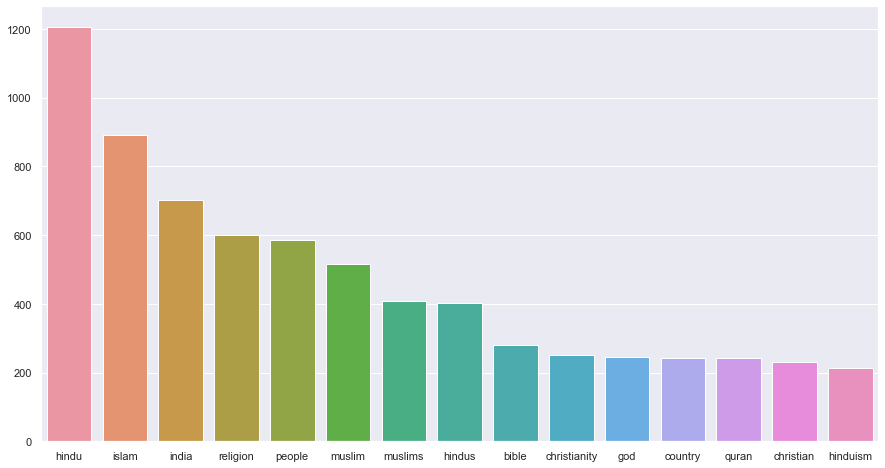

In [112]:
# plotting new word frequency with cleaned data

plot_word_frequency(sample_words, 15)